# COMP8650: Advanced Topics in SML - Assignment 5
# Ragib Zaman u6341578

In [1]:
import cvxpy as cvx
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1 - Linear Programming

In [2]:
# Create 4 scalar optimization variables.
x1 = cvx.Variable()
x2 = cvx.Variable()
x3 = cvx.Variable()
x4 = cvx.Variable()

# Form objective.
obj = cvx.Minimize(x1 + 2*x2 + 3*x3 + 4*x4)

# Create the constraints.
constraints = [x1 + x2 + x3 + x4 == 1,
               x1 - x2 + x3 - x4 == 0,
               x1 >= 0, x2 >= 0, x3 >= 0, x4 >= 0]

# Form and solve problem.
prob = cvx.Problem(obj, constraints)
prob.solve()  # Returns the optimal value.
print("Status:", prob.status)
print("Optimal value p* = %8f" % prob.value)
print("Optimal var   x* = (%8f, %8f, %8f, %8f)" % (x1.value, x2.value, x3.value, x4.value))



Status: optimal
Optimal value p* = 1.500000
Optimal var   x* = (0.500000, 0.500000, 0.000000, 0.000000)


# Question 2 - Regularized Maximum Likelihood Estimation

# (a)

Note that $l(\mathcal{D})$ as written in the assignment is missing a factor of $1/2,$ though this does not affect the optimisation problem to be solved.

We have $\mathcal{D} = \{ x_1, \ldots, x_m\}$ where we assume the samples $x_i\in \mathbb{R}^d$ are i.i.d samples from a $d$-dimensional Gaussian distribution with mean $\mu$ and symmetric positive definite covariance matrix $\Sigma.$ In this case the Guassian distribution is non-degenerate and has a density function (so the likelihood of the data is well defined). The density function of the distribution is given by 

$$ p(x) = \frac{1}{\sqrt{(2\pi)^d \det(\Sigma)}} \exp\left( -\frac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right)$$

The likelihood of the data is

\begin{align*}
p(\mathcal{D} \ | \ \Sigma) &= \prod_{i=1}^m p(x_i \ | \ \Sigma) &\text{by i.i.d property of samples} \\
&= \left( \frac{1}{\sqrt{(2\pi)^d \det(\Sigma)}}\right)^m \exp\left( -\frac{1}{2} \sum_{i=1}^m (x_i-\mu)^T \Sigma^{-1} (x_i-\mu) \right) \\
\end{align*}

The average log-likelihood of the data is therefore

\begin{align*}
l(\mathcal{D}) &:= \frac{1}{m} \log p(\mathcal{D} \ | \ \Sigma) \\
&= \frac{1}{2} \left(\log(\det(\Sigma^{-1})) - d \log(2\pi) \right) - \frac{1}{2} \cdot \frac{1}{m} \sum_{i=1}^m (x_i-\mu)^T \Sigma^{-1} (x_i-\mu) \\
\end{align*}

In the above we have used basic properties of $\log$ and $\exp,$ and the fact that $\det(\Sigma^{-1}) = \det(\Sigma)^{-1}.$

Note that we have the following identity:

\begin{align*}
\mathrm{tr}(\hat{\Sigma} \Sigma^{-1}) &:= \mathrm{tr} \left( \frac{1}{m} \sum_{i=1}^m (x_i-\mu)(x_i-\mu)^T \Sigma^{-1} \right) & \text{defn. of  } \hat{\Sigma} \\
&= \frac{1}{m} \sum_{i=1}^m \mathrm{tr} \left((x_i-\mu)(x_i-\mu)^T \Sigma^{-1}  \right) & \text{tr is a linear function} \\
&= \frac{1}{m} \sum_{i=1}^m \mathrm{tr} \left((x_i-\mu)^T \Sigma^{-1}(x_i-\mu)  \right) & \text{cycle invariant property of trace} \\
&= \frac{1}{m} \sum_{i=1}^m  (x_i-\mu)^T \Sigma^{-1}(x_i-\mu)  & \text{trace of 1x1 matrx is itself} \\
\end{align*}

Placing this into our previous expression for the average log-likelihood, we have 

$$ l(\mathcal{D}) = \frac{1}{2} \log( \det(\Sigma^{-1})) - \frac{1}{2} \mathrm{tr}( \hat{\Sigma} \Sigma^{-1} ) - \frac{d}{2} \log(2\pi)$$

Note that the last term is a constant.

# (b)

Recall that the notation $ K \succ 0 $ means that $K \in \mathbb{S}^d_{++}$ i.e. that $K$ is a $d$ by $d$ symmetric positive definite matrix. Note that $\mathbb{S}^d_{+}$ is a proper cone in $\mathbb{S}^d$, and in particular it is a convex set. The interior of a convex set is also convex (see Rockafellar, "Convex Analysis"), so the constraints of the problem define a feasilble set which is convex. 

We now verify that each individual term in the objective function is a convex function. 

i) $-\log \det K$ is a convex function on $\mathbb{S}^d_{++}$ - This was proved in lectures (Section - Convex functions, Slide 3-5) and also on page 74 of the course's main text (Boyd and Vanderweghe, "Convex Optimization").

ii) $ \mathrm{tr}(\hat{\Sigma}K)$ is a linear (hence convex) function of $K.$ Proof: By basic properties of the trace operator, we have for any square matricies $X,Y$ of the same dimension and real numbers $a,b:$

\begin{align*} 
\mathrm{tr}(\hat{\Sigma}(aX+bY)) &= \mathrm{tr}(a \hat{\Sigma}X + b \hat{\Sigma} Y) \\
&= \mathrm{tr}(a \hat{\Sigma}X ) + \mathrm{tr}( b \hat{\Sigma} Y)\\
&= a \ \mathrm{tr}( \hat{\Sigma}X ) + b \ \mathrm{tr}(  \hat{\Sigma} Y)\\
\end{align*}

iii) For every $1\leq i,j \leq d,$ the map $P_{ij} : \mathbb{R}^{d\times d} \to \mathbb{R}$ defined by $K \mapsto |K_{ij}|$ is a convex map. Proof: 

\begin{align*}
P_{ij}(tX + (1-t)Y) &= | t X_{ij} + (1-t) Y_{ij}| & \text{ by defn} \\
&\leq |t X_{ij}| + |(1-t)Y_{ij} & \text{ by the triangle inequality} \\ 
&=t |X_{ij}| + (1-t) |Y_{ij}| & \text{moving non-negative constants out of absolute value} \\
&= t P_{ij}(X) + (1-t)P_{ij}(Y) \\
\end{align*}

iv) Note that $\lambda$ is a non-negative parameter, and non-negative multiples of convex functions are convex. 

Therefore, the objective function of the problem is a convex function, and the constraints of the problem define a feasible set which is convex, so the problem is a convex optimization problem.

# (c)

# Load the data

In [3]:
X = pickle.load(open('asgn5q2.pkl', 'rb'))
m, d = X.shape
sigmaHat = np.cov(X, rowvar=0)

# Create CVX Optimization Problem

The diagonal entries of a positive definite matrix must be positive, so the regulariation term can be expressed as the matrix $1$-norm of $K$ (which is equivalent to the vector $1$-norm of the vector with the columns of $K$ vertically stacked) minus the trace of $K.$ 

In [4]:
# In the code we use beta in place of lambda, which is a Python keyword. 
beta = cvx.Parameter(nonneg=True)

# Construct the problem.
K = cvx.Variable((d,d), PSD=True)
log_likelihood = cvx.log_det(K) - cvx.trace(cvx.matmul(sigmaHat, K))
regularization_term = cvx.norm1(K) - cvx.trace(K)
error = beta*regularization_term - log_likelihood
obj = cvx.Minimize(error)
prob = cvx.Problem(obj)


# Plot objective, log-likelihood and number of non-zero entries vs Lambda

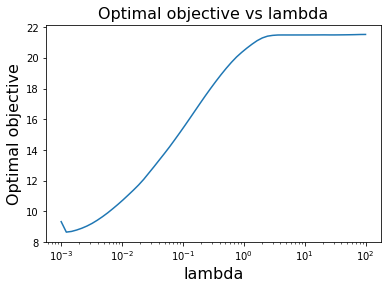

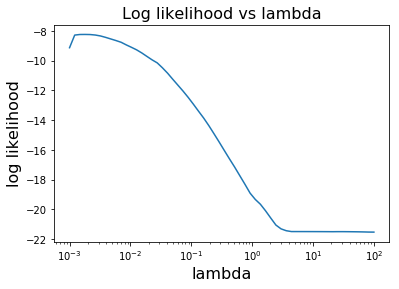

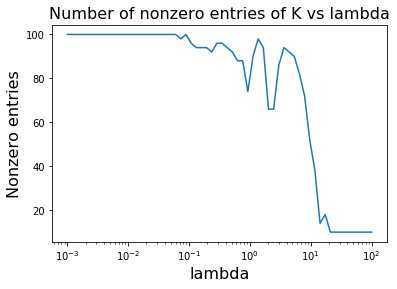

In [5]:
error_vals = []
log_likelihood_vals = []
nonzero_entries = []
beta_vals = np.logspace(-3, 2, num=60)
for val in beta_vals:
    beta.value = val
    prob.solve()
    error_vals.append(error.value)
    log_likelihood_vals.append(log_likelihood.value)
    nonzero_entries.append(np.count_nonzero(K.value > 1e-6) + np.count_nonzero(K.value < -1e-6))

plt.plot(beta_vals, error_vals)
plt.xlabel('lambda', fontsize=16)
plt.ylabel('Optimal objective', fontsize=16)
plt.xscale('log')
plt.title('Optimal objective vs lambda', fontsize=16)    
plt.show()

plt.plot(beta_vals, log_likelihood_vals)
plt.xlabel('lambda', fontsize=16)
plt.ylabel('log likelihood', fontsize=16)
plt.xscale('log')
plt.title('Log likelihood vs lambda', fontsize=16)    
plt.show()

plt.plot(beta_vals, nonzero_entries)
plt.xlabel('lambda', fontsize=16)
plt.ylabel('Nonzero entries', fontsize=16)
plt.xscale('log')
plt.title('Number of nonzero entries of K vs lambda', fontsize=16)    
plt.show()

As expected, increasing $\lambda$ has a general trend of forcing more entries to be zero, until eventually all the non-diagonal terms are zero. 

# Question 3 - Total Variation Denoising

# Plot original signal

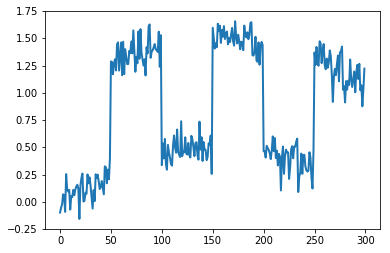

In [6]:
x_corr = pickle.load(open('asgn5q3.pkl', 'rb'))
n = len(x_corr)
x_corr = np.reshape(x_corr, (n,))
plt.plot(x_corr, linewidth=2)
plt.show()

# Create CVX optimization problem

In [7]:
# In the code we use gamma in place of lambda, which is a Python keyword. 
gamma = cvx.Parameter(nonneg=True)

# Construct the problem.
x = cvx.Variable(n)
error = cvx.sum_squares(x - x_corr)
obj = cvx.Minimize(error + gamma*cvx.tv(x))
prob = cvx.Problem(obj)

# Initial Experimentation

First we let $\lambda$ vary over a large interval. At the low end, the recovered signal will have excessively high fit to the corrupt signal (so will have high total variation). At the high end, the recovered signal will have very low total variation, but will not represent the original signal very accurately. We investigate this behaviour by plotting the trade-off curve and the entries of the recovered signal. From this analysis we will be able to determine what a more appropriate $\lambda$ may be.

Lambda     Sq error   Variation error
0.001000,  0.000195,  38.710532
0.002069,  0.000833,  38.295124
0.004281,  0.003548,  37.439190
0.008859,  0.014645,  35.742294
0.018330,  0.059531,  32.429708
0.037927,  0.217802,  26.713335
0.078476,  0.677421,  18.566399
0.162378,  1.586599,  10.468791
0.335982,  2.458749,  6.574691
0.695193,  2.911426,  5.560792
1.438450,  3.354100,  5.130136
2.976351,  4.475445,  4.607683
6.158482,  7.449787,  3.942508
12.742750,  18.745228,  2.746803
26.366509,  58.533741,  0.629838
54.555948,  74.332875,  0.213848
112.883789,  87.905105,  0.000000
233.572147,  87.905107,  0.000000
483.293024,  87.905107,  0.000000
1000.000000,  87.905107,  0.000000


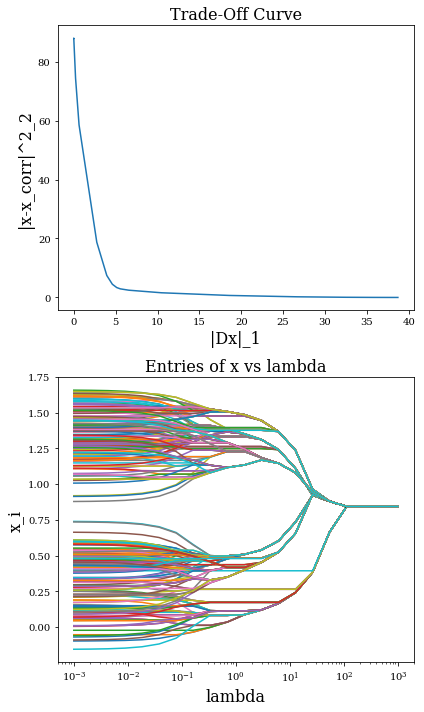

In [8]:
# Construct a trade-off curve of ||x-x_corr||^2 vs. ||Dx||_1
sq_penalty = []
l1_penalty = []
x_values = []
gamma_vals = np.logspace(-3, 3, num=20)
print("Lambda     Sq error   Variation error")
for val in gamma_vals:
    gamma.value = val
    prob.solve()
    # Use expr.value to get the numerical value of
    # an expression in the problem.
    sq_penalty.append(error.value)
    l1_penalty.append(cvx.tv(x).value)
    x_values.append(x.value)
    print("%4f,  %5f,  %4f" % (val, error.value, cvx.tv(x).value) )

#plt.rc('text', usetex=True)
plt.rc('text')
plt.rc('font', family='serif')
plt.figure(figsize=(6,10))

# Plot trade-off curve.
plt.subplot(211)
plt.plot(l1_penalty, sq_penalty)
plt.xlabel('|Dx|_1', fontsize=16)
plt.ylabel('|x-x_corr|^2_2', fontsize=16)
plt.title('Trade-Off Curve', fontsize=16)

# Plot entries of x vs. gamma.
plt.subplot(212)
for i in range(n):
    plt.plot(gamma_vals, [xi[i] for xi in x_values])
plt.xlabel('lambda', fontsize=16)
plt.ylabel('x_i', fontsize=16)
plt.xscale('log')
plt.title('Entries of x vs lambda', fontsize=16)

plt.tight_layout()
plt.show()

# Finding a 'good' parameter

The "good" values of $\lambda$ will in some neighbourhood of the hinge of the trade-off curve, where there is a decent balance between high fit and low variation. The trade-off curve suggests looking at the values of $\lambda$ where the variation error is approximately between 3 and 10. The table of output data shows that $\lambda$ values between 0.1 and 10 give a decent buffer around that range. The Entries vs $\lambda$ graph further justfies that the variation is not reduced very much for lower $\lambda,$ and reduced excessively for larger $\lambda.$ 

Therefore, we now plot some of the recovered signals with $\lambda$ between 0.1 and 10.

Lambda: 0.1


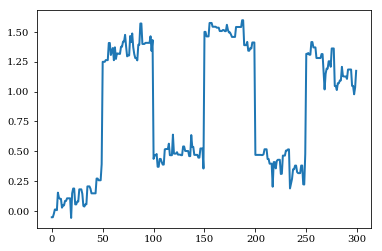

Lambda: 0.16681005372000587


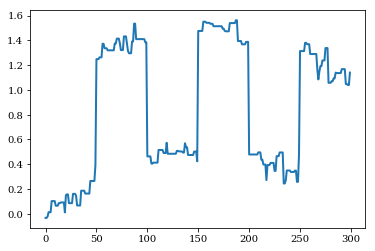

Lambda: 0.2782559402207124


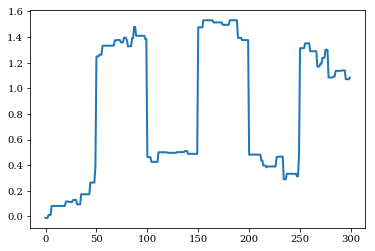

Lambda: 0.46415888336127786


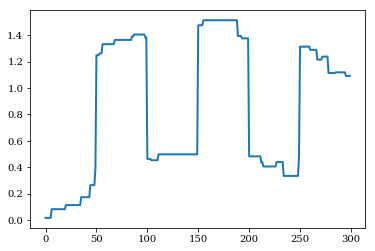

Lambda: 0.774263682681127


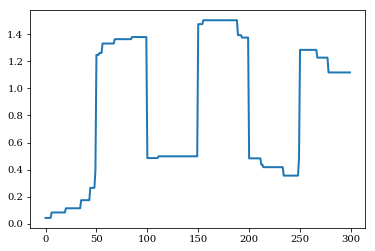

Lambda: 1.291549665014884


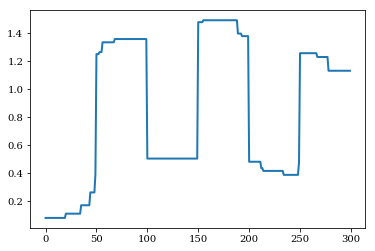

Lambda: 2.1544346900318834


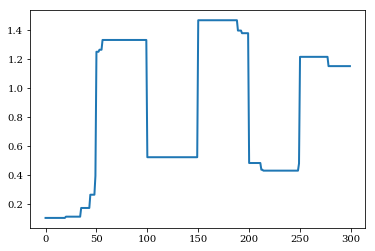

Lambda: 3.593813663804626


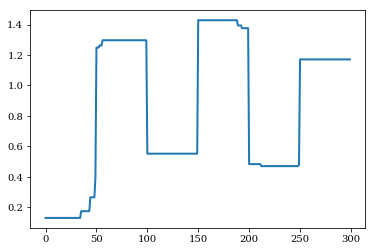

Lambda: 5.994842503189409


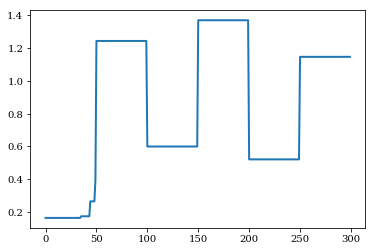

Lambda: 10.0


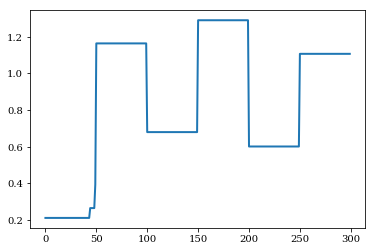

In [9]:
gamma_vals = np.logspace(-1, 1, num=10)
for val in gamma_vals:
    gamma.value = val
    prob.solve()
    print("Lambda:", val)
    plt.plot(x.value, linewidth=2)
    plt.show()

Exactly what constitutes what kind of recovered signal we are happy with depends on what properties we expect from the uncorrupted signal. Roughly however, we can see that $\lambda$ between 0.15 and 0.5 keep the spikes and the increasing/decreasing trends of the original signal while still grealy decreasing the noise.

As specific example of a "good" value of $\lambda$ is 0.3, which we plot below.

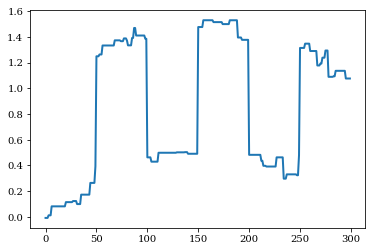

In [10]:
gamma.value =0.3
prob.solve()
plt.plot(x.value, linewidth=2)
plt.show()